# Predictive Model to Classify loan applicants 
Project no : PY001

CIND 119 Class Project - The Chang School of Continuing Education at Toronto Metropolitan University 

presented to proffesor Syed Shariyar Murtaza, Ph.D. on Dec 13, 2022

Author : Manohari Wijesooriya

Python packages used - **Pandas, Sklearn and Pandas profiling package**
Other tools used - PowerBI , R

**Business Question  : How do we identify good clients to approve loans?**

Business Objective : Minimise risk and maximise profit of the bank
when the bank receive loan application, based on client's profile the bank need to take a deicision on whether to approve the loan or not. 

Information available : the German Credit card data contain data on 20 attributes and the classification whether the client is good (1) or bad (0) credit risk for 1000 loan applicants.


# Stage1 : Data Preparation

In [ ]:
#Installing Python packages
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Upload data file german_credit.arff. In this file categorical and numeric data types are defined correctly.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.arff to german_credit.arff


In [4]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="german_credit.arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
#print(df.dtypes)



In [ ]:
# this is to run the model after feature selection
#df=filtered_data

In [6]:
# look at meta information about data, such as null values
## observartion : no null values in this file ##
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [7]:
# Let's see meta information about numeric data, we can also see if there any extreme values
## Observation : average age of clients = 36 years, most of the loan applicants take loans for more than 12 months (average duration of credit = 21 months)##
df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


*There are two sections in this tutorial. First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding. * 

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [9]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

# Stage2 : Predictive Modeling (Classification)
At this stage we use different classification algorithms and identify the features to build best model with high accuracy and lower flase positives.

# Section A
a) Use sklearn model to develop decision tree

b) Use Multinomial Naive Bayes model


**Let's develop a decison tree in Python**

In [10]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

Below is the code to train the decision tree.  the maximum depth of the tree is set to 5 here.

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Information about decision tree classifier.

In [12]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

Let's plot the tree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['1' '0']


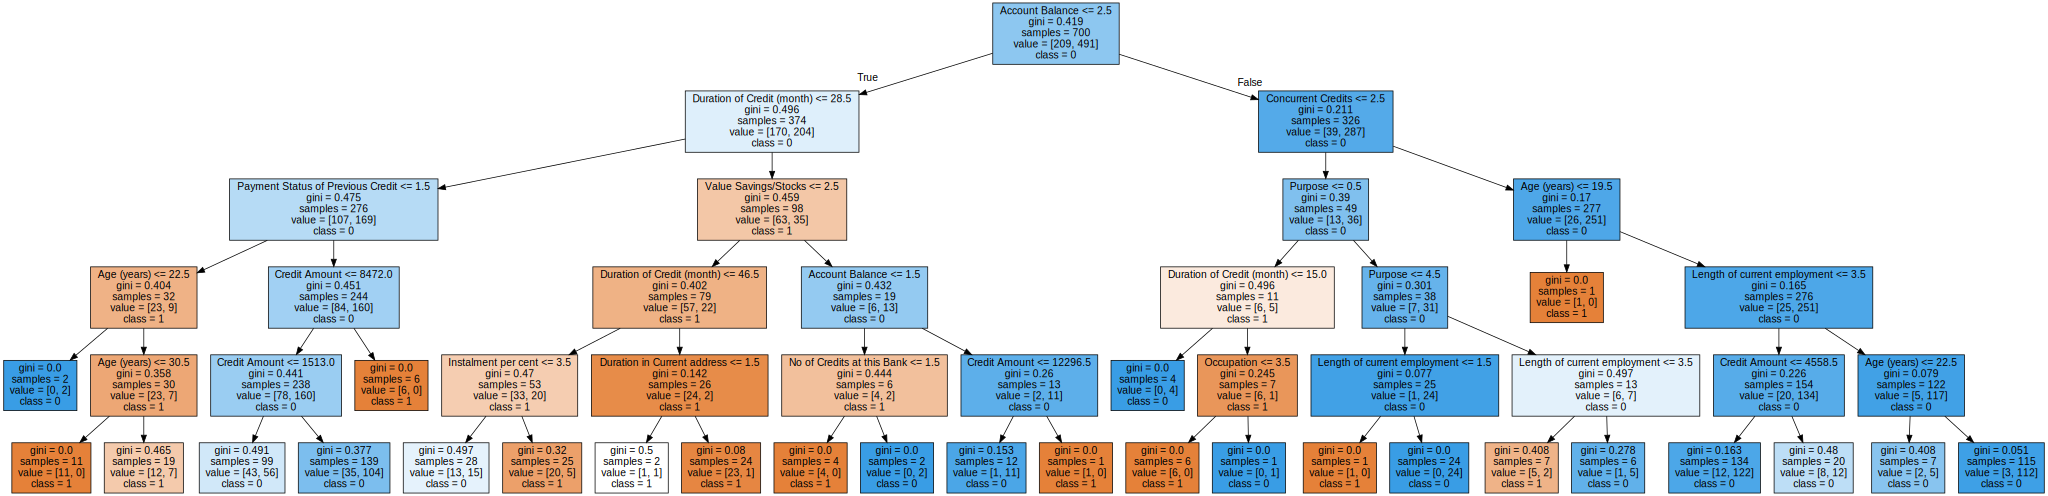

In [13]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In the tree above, decsion tree used the categorical attribute as numeric attribute and generated results. This is because values in each of the categorical attribute was already encoded as numbers (1,2,3...etc.). This type of categorical encoding to numeric values is called Label encoding. It is valid to use this sort of method but it has a disadvantage that higher number could mean bigger weight for a value but it may just be a different value. We shall see another method to avoid this below. If we had strings in values, then the above code would have generated an error. 

In [14]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [15]:
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf1)
tn, fp, fn, tp=cf1.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [16]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



**In a similar way, we can train and test Naive Bayes**
It is a classification technique based on Bayes' theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [17]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [18]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [19]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66053824 -5.09289346 -7.52920224 -7.2442712  -0.02385625 -7.77176387
  -7.16792253 -7.18335493 -7.34322437 -8.16470272 -7.27277271 -7.3616411
  -4.77281549 -7.37473764 -7.66053824 -7.98653918 -7.23113472 -8.16470272
  -7.97617639 -8.28352364]
 [-6.96381256 -5.09018055 -7.03265538 -7.02592638 -0.03094527 -7.19521844
  -6.79713562 -6.95892257 -7.02443718 -7.89278845 -6.9965557  -7.21662871
  -4.4432513  -7.02816435 -7.36613136 -7.65976479 -6.96451308 -7.8874834
  -7.68825674 -7.98173594]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [20]:

from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300

Confusion Matrix
[[ 37  54]
 [ 58 151]]
TP:  151 , FP:  54 , TN:  37 , FN: 58


# Section 2: Categorical to One-Hot (numeric) Encoding 
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [21]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
          ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
          "Telephone","Foreign Worker"]


In [158]:
#use with selected attributes
#cat_cols=["Account Balance","Payment Status of Previous Credit"]

In [22]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


,Creditability,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents,Account Balance_1,Account Balance_2,Account Balance_3,...,Type of apartment_2,Type of apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,1,18.0,1049.0,4.0,21.0,1.0,1.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,9.0,2799.0,2.0,36.0,2.0,2.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,12.0,841.0,2.0,23.0,1.0,1.0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,1,12.0,2122.0,3.0,39.0,2.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,1,12.0,2171.0,4.0,38.0,2.0,1.0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24.0,1987.0,2.0,21.0,1.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
996,0,24.0,2303.0,4.0,45.0,1.0,1.0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
997,0,21.0,12680.0,4.0,30.0,1.0,1.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
998,0,12.0,6468.0,2.0,52.0,1.0,1.0,0,1,0,...,1,0,0,0,0,1,0,1,1,0


In [137]:
####
## For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values. Those columns won't work with Naive Bayes. So run the following
# line of code for bank data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
#df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
#df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)


In [23]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Creditability"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [24]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [25]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [205. 495.]
Log prior probability for classes  [-1.22807036 -0.34652257]
Log conditional probability for each feature given a class
 [[ -5.07717035  -0.02043849  -7.11378092  -4.73218569  -7.94918926
   -8.1045397   -9.0550218   -9.30014426 -11.1789151  -10.05044985
  -10.6323714  -10.5810781   -8.84942256 -10.53228794  -9.96589246
   -9.46593651 -11.09190373 -11.96737246  -9.86323831  -9.77014789
  -12.47819809 -11.3795858  -10.80422166 -12.8836632  -10.53228794
   -8.55292986 -10.5810781  -11.3795858  -11.78505091 -10.44131616
  -10.74359703  -9.72666278  -9.32831514 -10.24460587  -9.70560937
  -10.74359703  -9.17009113  -9.01246219 -10.93775305  -8.33506336
  -11.09190373 -11.63090023 -10.31871384  -9.37211776  -9.96589246
   -9.20736252  -9.81561026  -9.68499008  -9.34270387  -9.70560937
   -9.93922422 -10.86876018  -8.53338526  -9.60651846  -8.74849664
  -10.175613   -12.19051602  -9.81561026  -8.7727893

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


We have probailities of a lot more features now.

See evaluation metrics below.

In [26]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 50  45]
 [ 61 144]]
TP:  144 , FP:  45 , TN:  50 , FN: 61


In [27]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.45      0.53      0.49        95
           1       0.76      0.70      0.73       205

    accuracy                           0.65       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.65      0.65       300



**Let's run decision tree on one-hot encoded data**

class Names ['1' '0']


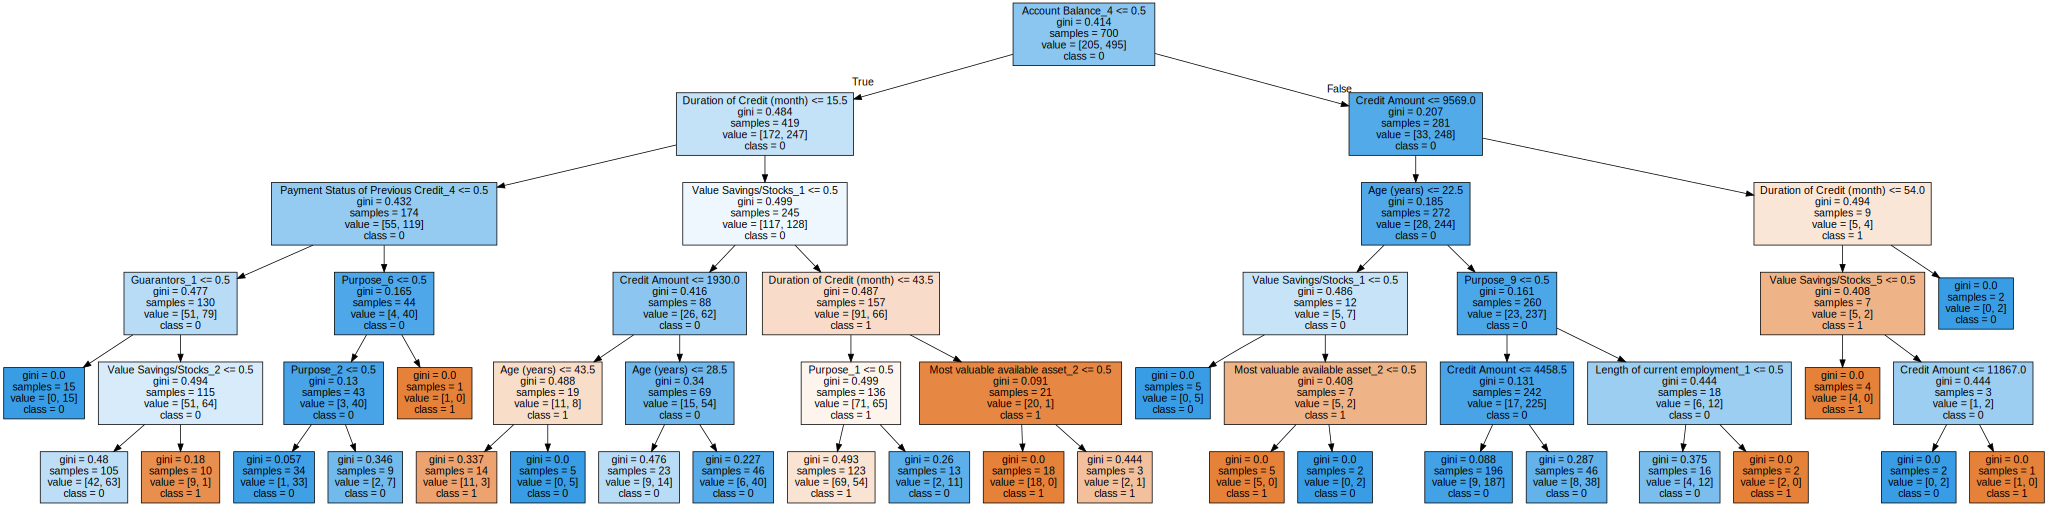

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [29]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [30]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.48      0.51        95
           1       0.77      0.81      0.79       205

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.71      0.70       300



In [31]:
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 46  49]
 [ 39 166]]
TP:  166 , FP:  49 , TN:  46 , FN: 39


In [32]:
#Base model
#Classification algorithm
cf1=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf1)
tn, fp, fn, tp=cf1.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 46  49]
 [ 39 166]]
TP:  166 , FP:  49 , TN:  46 , FN: 39


# Stage3 : Select Features based on model evaluation
Age and Marital status are not selected as these confounding variables can create bias in the model

selected attributes - Credit Amount, Account Balance, Payment Status of Previous Credit

In [33]:
filtered_data=df.drop(columns=['Purpose', 'Value Savings/Stocks', 'Length of current employment', 'Sex & Marital Status', 'Age (years)', 'Guarantors', 'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits','Type of apartment', 'Occupation',
          'Telephone', 'Foreign Worker','Instalment per cent','No of dependents','Duration of Credit (month)','No of Credits at this Bank'])
filtered_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Payment Status of Previous Credit  1000 non-null   object 
 3   Credit Amount                      1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


# Run the model with selected features and note down evaluation results

following give the best results. (high accuracy = 71%, low false positive = 66,  f1 score for class 0 = 0.40 



# Stage4 -  Recomendations
Statistically significant attributes predicting **Creditability**  - Credit Amount, Account Balance, Payment Status of Previous Credit

**Predictive Model**
 - Training / Test data – split 70:30 with random seed 1 
 - Classification Algorithm- sklearn, Categorical to One-Hot (numeric) encoding , decision tree with maximum depth = 5 
- predict with 71% accuracy

Additional notes : Age and Marital status are not selected as these confounding variables can create bias in the model